<a href="https://colab.research.google.com/github/cryingjin/Today-I-Learned/blob/master/Assignment_Kaggle_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Apps Dataset
Google Play Store dataset을 가져왔습니다.   
Rating 컬럼을 target으로 설정하고 예측하는 앙상블을 진행해봅시다  



|  <center>변수명</center> |  <center>설명</center> |  <center>비고</center> |
|:--------|:--------|:--------|
| App | 어플명 | |  
| Rating | 평점 | target |
| Reviews | 리뷰갯수 | |
| Size | 어플 크기 | |
| Installs | 다운로드 횟수 | |
| Price | 가격 | |
| Content Rating | 관람가 | |
| Genres | 세부장르 | |
| Last Updated | 마지막 업데이트 | |

In [ ]:
cd /content/drive/My Drive/투빅스_정규세션2/강의준비

/content/drive/My Drive/투빅스_정규세션2/강의준비


In [ ]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

In [ ]:
# Load Data
train = pd.read_csv('ggstore_train.csv')
test = pd.read_csv('ggstore_test.csv')

## 1. EDA & Data Processing


* 데이터 확인 및 결측치 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


#### 연속형 변수

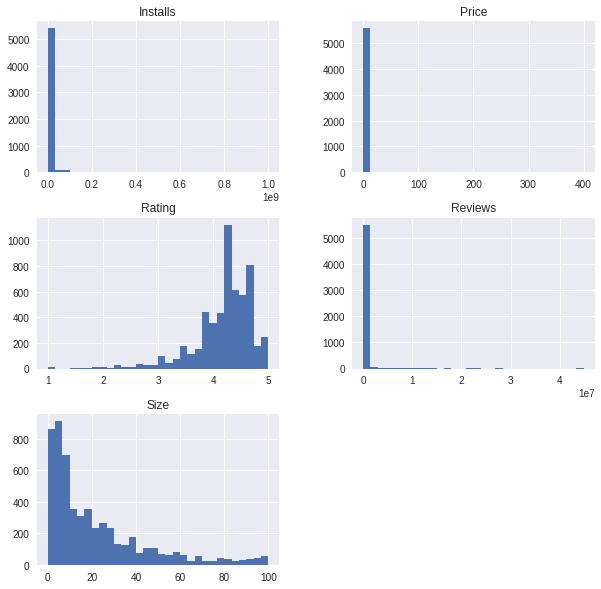

In [ ]:
# 연속형 변수 분포 확인
continuous = train[['Rating','Reviews','Size','Installs','Price']]
continuous.hist(bins=30,figsize=(10,10))
plt.show()

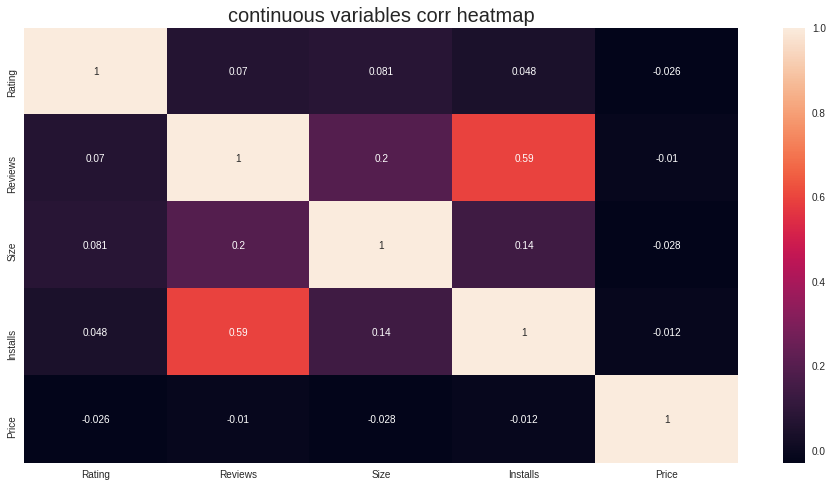

In [ ]:
# 연속형 변수 heatmap 상관관계 시각화
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(), annot=True)
plt.title('continuous variables corr heatmap', fontsize=20)

plt.show()

### 연속형 변수 이상치 확인
Type 은 유무료를 나타내는 범주형

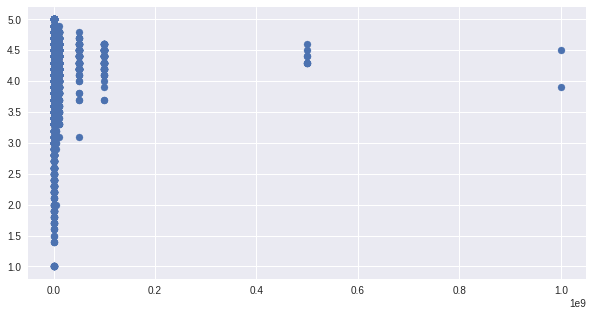

In [ ]:
# Installs
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Installs'], y = continuous['Rating'])

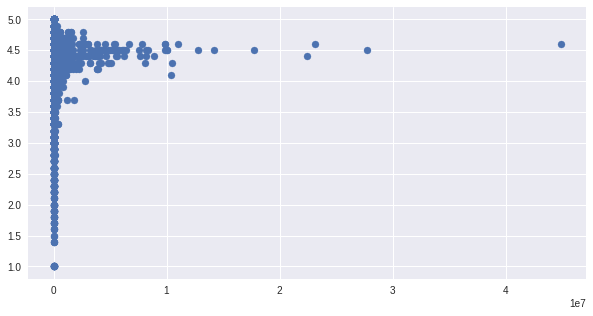

In [ ]:
# Reviews
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Reviews'], y = continuous['Rating'])

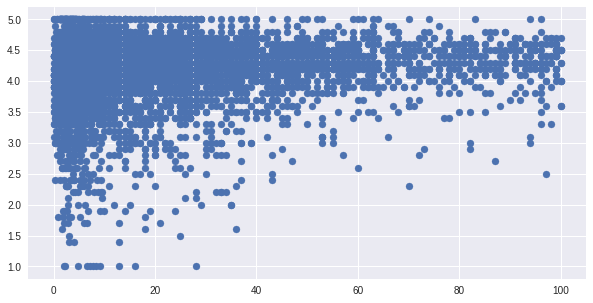

In [ ]:
# Size
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Size'], y = continuous['Rating'])

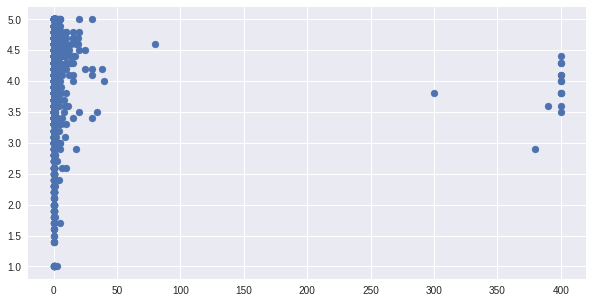

In [ ]:
# Price
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Price'], y = continuous['Rating'])

#### IQR 기준으로 완전 이상한거 몇개만 제거 해 봅시다
저는 Installs,Reviews 와 Price에서만 제거해보겠습니당

* IQR 기준으로

In [ ]:
def remove_outlier(df,col):
  data = df[col]
  q25 = np.percentile(data.values,25)
  q75 = np.percentile(data.values,75)

  IQR = q75 - q25
  IQR = IQR * 1.5
  low = q25-IQR ; high = q75+IQR
  outlier_index = data[(data<low)|(data>high)].index
  #print(len(outlier_index))
  #df.drop(outlier_index, axis=0, inplace=True)
  #print(df.shape)
  #return df
  return len(outlier_index)

In [ ]:
print(remove_outlier(continuous,'Installs'))
print(remove_outlier(continuous,'Reviews'))
print(remove_outlier(continuous,'Price'))

1162
924
441


IQR 기준이면 너무 많은 이상치가 발견되서 데이터 손실이 너무 컸습니다!  
scatter plot 에 당장 눈에 보이는 정말 몇개만 제거합시다  


* 직관적으로

In [ ]:
out_installs = continuous[continuous['Installs'] > 200000000]
out_price = continuous[continuous['Price'] > 250]
out_reviews = continuous[continuous['Reviews'] > 15000000]
print(len(out_installs))
print(len(out_price))
print(len(out_reviews))

10
15
5


In [ ]:
continuous = continuous.query('Installs < 200000000 and Price < 250 and Reviews < 40000000')
continuous.shape

(5590, 5)

저는 이정도만 하겠습니당   
scaling과 feature engineering을 더 하실 분은 하셔도 됩니다!  
우린 1주차 EDA 에서 다양한 스케일링을 배웠죵  

### 범주형 변수 확인  
Category, Content Rating, Genres 확인

In [ ]:
category_count = train['Category'].value_counts()
category_count

FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
ART_AND_DESIGN           57
LIBRARIES_AND_DEMO       57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
BEAUTY                   34
EVENTS                   34
Name: Category, dtype: int64

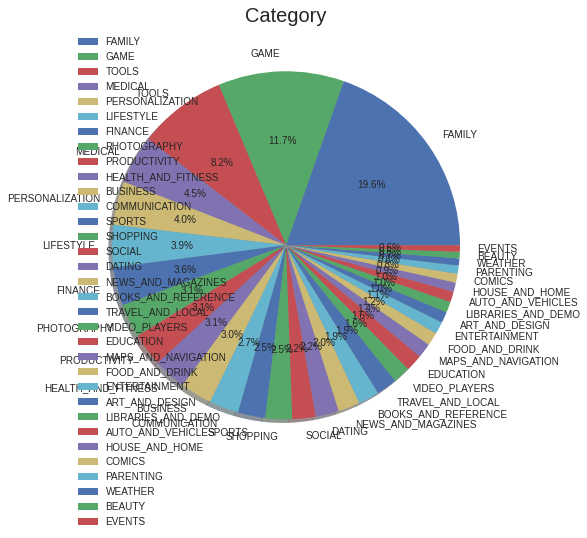

In [ ]:
# Category 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(category_count,labels=category_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Category',size = 20)
plt.legend()
plt.show()

In [ ]:
con_rating_count = train['Content Rating'].value_counts()
con_rating_count

Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

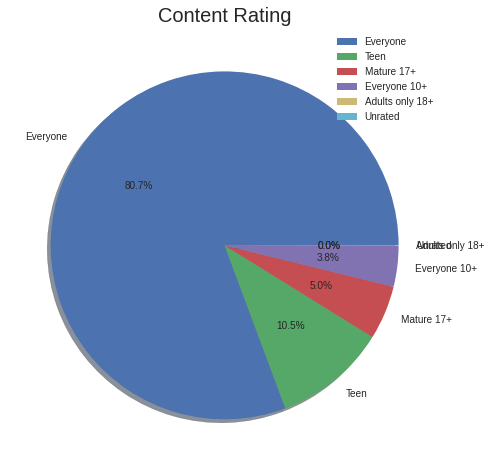

In [ ]:
# Content Rating 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(con_rating_count,labels=con_rating_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.legend()
plt.show()

In [ ]:
genres_count = train['Genres'].value_counts()
genres_count

Tools                                    463
Entertainment                            337
Education                                309
Medical                                  253
Personalization                          227
Lifestyle                                219
Action                                   214
Finance                                  201
Photography                              175
Productivity                             173
Health & Fitness                         172
Business                                 166
Communication                            153
Sports                                   149
Shopping                                 139
Arcade                                   129
Social                                   122
Dating                                   121
News & Magazines                         114
Simulation                               110
Books & Reference                        109
Travel & Local                           107
Video Play

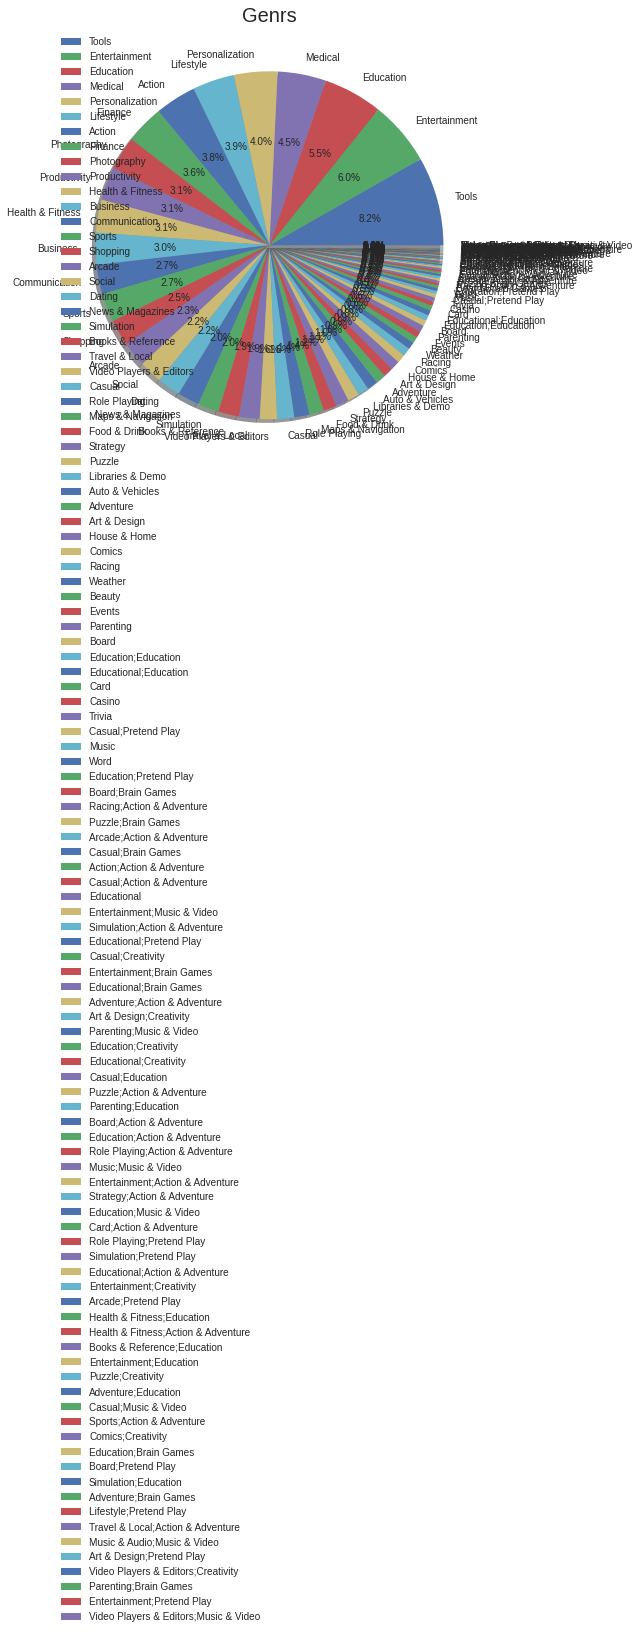

In [ ]:
# Genrs 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(genres_count,labels=genres_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Genrs',size = 20)
plt.legend()
plt.show()

## 2. Regression Modeling  
저는 각각의 분류기에 대해서 하이퍼파라미터 튜닝을 거의 하지 않앗어요!   
여러분은 다양한 시도를 해보세요!

저는 연속형 변수만을 가지고 앙상블을 할거에요.  
여러분은 저번에 배운 더미변수화를 이용해보세요



In [ ]:
# sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5590 entries, 0 to 5615
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    5590 non-null   float64
 1   Reviews   5590 non-null   int64  
 2   Size      5590 non-null   float64
 3   Installs  5590 non-null   float64
 4   Price     5590 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 262.0 KB


In [ ]:
# target 분리, data split
y = continuous['Rating']
X = continuous.iloc[:,1:5]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=318)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


In [ ]:
# Update test data
test_ID = test['Id']
test = test[['Reviews','Size','Installs','Price']]

* validation function

In [ ]:
n_folds = 5
train = X
def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [ ]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

### Base models  
scaler 로  RobustScaler를 사용하겠습니다 ~   
다양한 스케일러가 있으니 바꿔서 사용해보세용!

* Linear Regression
2주차에 배웠쭁 ㅎㅎㅎ~  
LASSO 나 Lidge를 써보셔도 좋습니다 ㅎㅎ

In [ ]:
lr = make_pipeline(RobustScaler(), LinearRegression())

* DecisionTreeRegressor  
의사결정나무 dt입니다~ 약분류기를 만들어 주려고 깊이를 10만 설정해볼게요

In [ ]:
dt = make_pipeline(RobustScaler(), DecisionTreeRegressor(max_depth=10))

* KNN


In [ ]:
knn = make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors = 3))

* SVM (Support Vector Machine)  
바로 앞 시간에 띵강이 있었던 서포트 벡터 머신입니다~!   
얘는 데이터가 1만개가 넘어가면 조금 힘들어하는데 지금은 8000개니깐 그냥 써보겠습니다 @@

In [ ]:
svm = make_pipeline(RobustScaler(),SVR())

* Random Forest  
ensemble 모델 중에 bagging 모델의 한 종류라고 배운 random forest 입니닷

In [ ]:
rf = make_pipeline(RandomForestRegressor())

* GBM  
Boosting 모델로 배운 Gradient boosting 입니다!

In [ ]:
gbm = make_pipeline(GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.05,
                                              max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10,
                                              loss = 'huber', random_state=1004))

* XGBoost

In [ ]:
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

* LightGBM

In [ ]:
lgb = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20) 

### Base model Scores  
먼저 각 모델의 score를 봅시다.

In [ ]:
score = rmse_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.5507 (0.0310)



In [ ]:
score = rmse_cv(dt)
print("\nDecision tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Decision tree score: 0.6050 (0.0414)



In [ ]:
score = rmse_cv(knn)     
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN score: 0.6130 (0.0218)



In [ ]:
score = rmse_cv(svm)     
print("\nSVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM score: 0.5488 (0.0335)



In [ ]:
score = rmse_cv(rf)     
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.5646 (0.0316)



In [ ]:
score = rmse_cv(gbm)     
print("\nGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBM score: 0.5633 (0.0288)



In [ ]:
score = rmse_cv(xgb)     
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost score: 0.5487 (0.0309)



In [ ]:
score = rmse_cv(lgb)     
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM score: 0.5302 (0.0301)



부스팅 계열은 시간이 정말 오래걸리죠  
아마 앙상블하고 튜닝하고 과제에 시간이 오래 걸릴겁니다!  
최선을 다해주세요~~

# 3. Stacking models   
basic & cv 기반

* Averaged base models class

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X_train, y_train):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X_test):
        predictions = np.column_stack([
            model.predict(X_test) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

* Averaged base models score  
위의 base model score 에서 loss와 분산을 고려해서 모델 4개만 써보겠습니다~

In [ ]:
averaged_models = AveragingModels(models = (dt, svm, lgb, knn))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4514 (0.0240)



별로 안좋아졌네요! ^^!

### Less simple Stacking : Adding a Meta-model  
단순 평균 합산이 아닌 meta model 을 학습시켜주는 stacking 방법입니다!  
다른 방법을 쓰시거나 직접 구현하셔도 되고 아래의 코드를 쓰셔도 됩니다  
사이킷런 라이브러리로는 vecstack 이 있고, keras 를 이용한 방법도 구글링하면 많이 나옵니다!

* KFold 기반 Stacking

In [ ]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=10):
  kfold = KFold(n_splits = n_folds, random_state = 1004)
  
  # 최종 모델에서 사용할 데이터 셋 세팅 (0 값으로)
  # 만약 shape가 (100,10)이었으면 폴드의 검증 과정 중 저장할 데이터는 (100,1)으로 한다.
  train_fold_predict = np.zeros((X_train.shape[0],1))
  # test 는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold갯수) 모양이다.
  # 해당 폴드마다 X_test의 예측 값을 fold 에 넣는다! meta model 이 쓸꺼임
  test_predict = np.zeros((X_test.shape[0], n_folds))
  print('model : ',model.__class__.__name__)
  
  for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_train_ = X_train.iloc[train_index]
    y_train_ = y_train.iloc[train_index]
    X_valid = X_train.iloc[valid_index]

    # 학습
    model.fit(X_train_,y_train_)
    # 해당 폴드에서 학습된 모델에다가 검증 데이터 (X_valid)로 예측 후 저장
    train_fold_predict[valid_index,:] = model.predict(X_valid).reshape(-1,1)
    # 해당 폴드에서 생성된 모델에게 원본 테스트 데이터 (X_test)를 이용해서 예측하고 저장
    test_predict[:,cnt] = model.predict(X_test)
  
  # for 문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
  test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
  
  return train_fold_predict, test_predict_mean

In [ ]:
# 앙상블 수행 dt, svm, lr ->  lgb
dt_train, dt_test = get_stacking_data(dt, X_train, y_train, X_test)
svm_train, svm_test = get_stacking_data(svm, X_train, y_train, X_test)
lr_train, lr_test = get_stacking_data(lr, X_train, y_train, X_test)

model :  Pipeline
model :  Pipeline
model :  Pipeline


In [ ]:
# return 된 kfold 결과와 X_test 결과를 skacking
new_X_train = np.concatenate((dt_train,svm_train,lr_train), axis=1)
new_X_test = np.concatenate((dt_test,svm_test,lr_test), axis=1)

print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3912, 4) (1678, 4)
새로운 :  (3912, 3) (1678, 3)


In [ ]:
# 최종 모델 훈련
xgb.fit(new_X_train,y_train)
stack_pred = xgb.predict(new_X_test)

print("\n Final score: {:.4f}".format(rmse(y_test,stack_pred)))


 Final score: 0.3128


성능 구립니다! 여러분이 개선해주세요~!  
StratifiedKFold도 사용해보세요!  https://lsjsj92.tistory.com/559

* StackingAveragedModels  
meta model을 사용하는 StackingAveragedModels class를 사용하겠습니당

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = [gbm,dt,svm],
                                                 meta_model = xgb)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.5067426872128392


* sklearn.ensemble.StackingRegressor  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
# 파라미터 설정
estimators = [
              ('lr',lr),
              ('svm',svm),
              ('gbm',gbm)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(n_estimators=3, random_state=42),
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

-0.3076250506806117

In [ ]:
# rmse
rmse(y_test,reg.predict(X_test))

0.590169657925366

### Final Training and Prediction  


* Ensemble prediction

In [ ]:
ensemble = stacked_pred

* Submission

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['Rating'] = ensemble
sub.to_csv('submission.csv',index=False)

In [ ]:
sub.head()

,Id,Rating
0,5617,4.239354
1,5618,3.916549
2,5619,4.190704
3,5620,4.260080
4,5621,4.430352
